In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data from CSV
sp_data = pd.read_csv('SP500_5y.csv', parse_dates=['Date'])

# Ensure 'date' column is in datetime format
sp_data['Date'] = pd.to_datetime(sp_data['Date'], utc=True)

# Sorting by date 
sp_data.sort_values(by='Date', inplace=True)

# Handling missing values if any
sp_data.dropna(inplace=True)


In [35]:
sp_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [36]:
# Display DataFrame for context
sp_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-06 05:00:00+00:00,2735.050049,2738.080078,2724.149902,2731.610107,3486590000,0.0,0.0
1,2019-02-07 05:00:00+00:00,2717.530029,2719.320068,2687.260010,2706.050049,4114040000,0.0,0.0
2,2019-02-08 05:00:00+00:00,2692.360107,2708.070068,2681.830078,2707.879883,3649510000,0.0,0.0
3,2019-02-11 05:00:00+00:00,2712.399902,2718.050049,2703.790039,2709.800049,3395330000,0.0,0.0
4,2019-02-12 05:00:00+00:00,2722.610107,2748.189941,2722.610107,2744.729980,3843020000,0.0,0.0


19:08:19 - cmdstanpy - INFO - Chain [1] start processing
19:08:19 - cmdstanpy - INFO - Chain [1] done processing


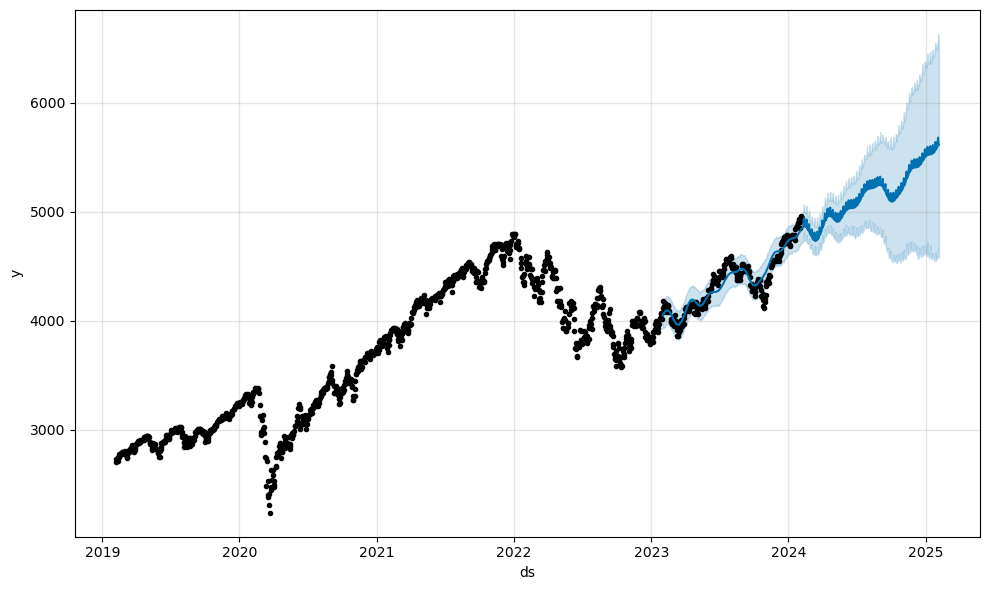

In [46]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare data for Prophet
prophet_data = sp_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Remove timezone from the 'ds' column
prophet_data['ds'] = prophet_data['ds'].dt.tz_localize(None)

# Instantiate and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Make future predictions starting from 2023-01-31
future = prophet_model.make_future_dataframe(periods=365, freq='D', include_history=True)
future = future[future['ds'] >= '2023-01-31']  # Subset future dataframe starting from 2023-01-31
forecast = prophet_model.predict(future)

# Plot forecast
fig = prophet_model.plot(forecast)

19:11:25 - cmdstanpy - INFO - Chain [1] start processing
19:11:26 - cmdstanpy - INFO - Chain [1] done processing


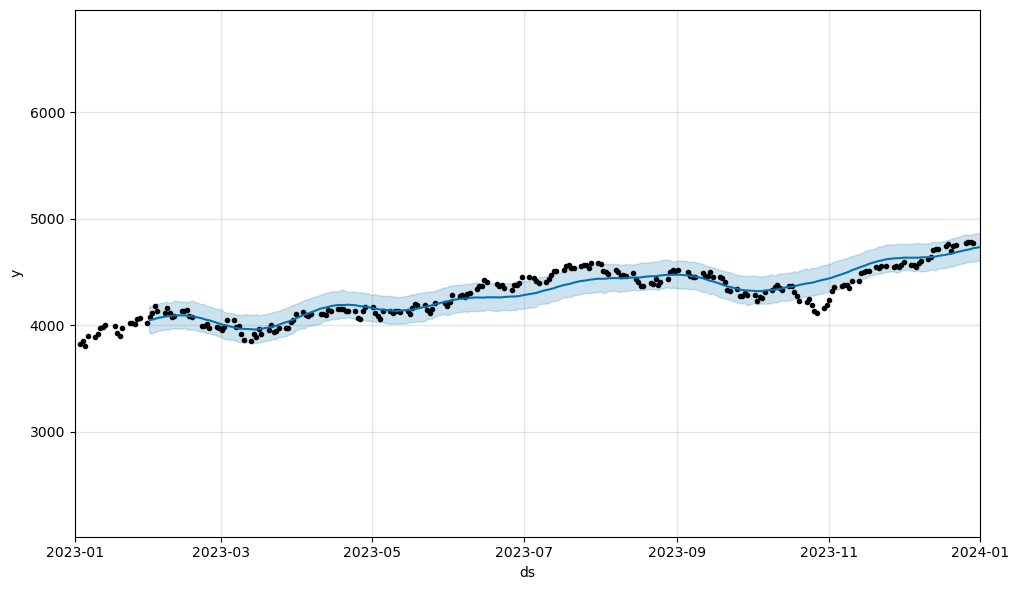

In [47]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare data for Prophet
prophet_data = sp_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Remove timezone from the 'ds' column
prophet_data['ds'] = prophet_data['ds'].dt.tz_localize(None)

# Instantiate and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Make future predictions starting from 2023-01-31
future = prophet_model.make_future_dataframe(periods=365, freq='D', include_history=True)
future = future[future['ds'] >= '2023-01-31']  # Subset future dataframe starting from 2023-01-31
forecast = prophet_model.predict(future)

# Plot forecast
fig = prophet_model.plot(forecast)
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-01-01'))  # Limit x-axis to display only 2023 data
plt.show()

In [23]:
# Extract features and target variable
X = sp_data.index
y = sp_data['Close']

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Instantiate the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [26]:
# Make predictions on the testing set
y_pred = model.predict(X_test.values.reshape(-1, 1))

Mean Squared Error (MSE): Imagine we have a model that tries to predict the daily closing price of the S&P 500 over the past five years. The MSE tells us, on average, how far off our predictions are from the actual closing prices. So, with an MSE of 121267.66151, it means, on average, the squared difference between our predicted prices and the actual prices is approximately $121267.66. Lower MSE values indicate our model's predictions are closer to the actual prices, which is better.

R-squared (R2): This tells us how much of the ups and downs in the S&P 500's closing prices over the past five years our model can explain. An R-squared value of 0.69644 means that about 69.644% of the variation in the S&P 500's closing prices can be explained by the factors considered in our model. So, the higher the R-squared value, the better our model is at explaining why the S&P 500's prices change the way they do.

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Round both MSE and R2 to 5 decimal places
mse_rounded = round(mse, 5)
r2_rounded = round(r2, 5)

print("Mean Squared Error (MSE):", mse_rounded)
print("R-squared (R2):", r2_rounded)

Mean Squared Error (MSE): 121267.66151
R-squared (R2): 0.69644


The RMSE measures the average difference between the actual closing prices of the S&P 500 over the past five years and the prices predicted by our model. It's like taking the average distance between each predicted S&P 500 price and the actual price, squaring those distances, finding the average of these squared differences, and then taking the square root of that average.

In this case, with an RMSE of 348.23507, it means, on average, our model's predictions for the closing price of the S&P 500 over the past five years are off by approximately $348.24. Lower RMSE values indicate that our model's predictions are closer to the actual prices, which is generally preferred as it signifies better predictive accuracy

In [28]:
import math

# Calculate RMSE
rmse = math.sqrt(mse)

# Round RMSE to 5 decimals
rmse_rounded = round(rmse, 5)

print("Root Mean Squared Error (RMSE):", rmse_rounded)

Root Mean Squared Error (RMSE): 348.23507


In [29]:
# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Index': future_index_ticks.flatten(), 'Predicted_Close': future_predictions}).round(2)

display(future_df.head(10))
display(future_df.tail(10))

,Index,Predicted_Close
0,1258,4699.87
1,1259,4701.29
2,1260,4702.72
3,1261,4704.15
4,1262,4705.58
5,1263,4707.01
6,1264,4708.44
7,1265,4709.87
8,1266,4711.29
9,1267,4712.72


,Index,Predicted_Close
355,1613,5207.02
356,1614,5208.45
357,1615,5209.88
358,1616,5211.31
359,1617,5212.74
360,1618,5214.17
361,1619,5215.60
362,1620,5217.02
363,1621,5218.45
364,1622,5219.88


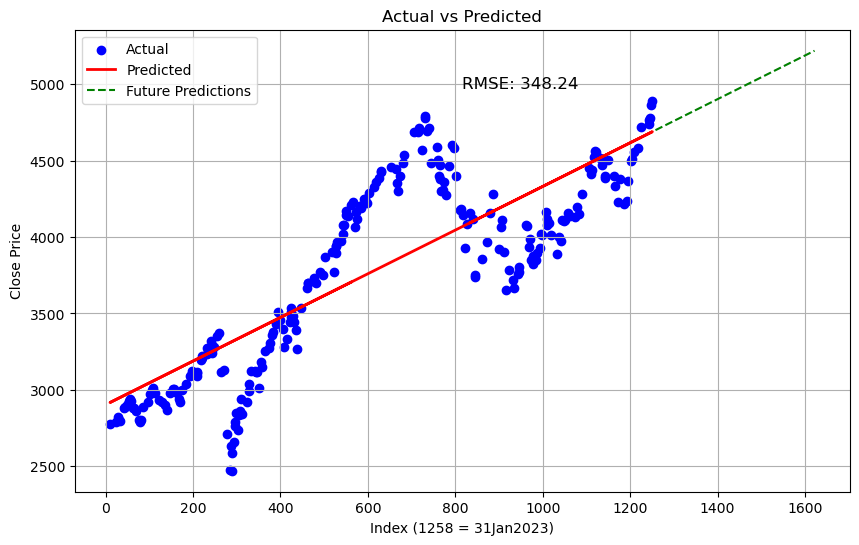

In [33]:
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plotting actual data, predictions, future predictions, and RMSE
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.plot(future_index_ticks, future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.text(0.5, 0.9, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.title('Actual vs Predicted')
plt.xlabel('Index (1258 = 31Jan2023)')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [171]:
# Load spot price of Gold data from CSV
gold_data = pd.read_csv('gold_spot_5y.csv')


In [174]:
# Ensure 'Date' column is in datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'], utc=True)

# If not sorted, sort it first
gold_data.sort_values(by='Date', inplace=True)

In [176]:
sp_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-06 05:00:00+00:00,2735.050049,2738.080078,2724.149902,2731.610107,3486590000,0.0,0.0
1,2019-02-07 05:00:00+00:00,2717.530029,2719.320068,2687.260010,2706.050049,4114040000,0.0,0.0
2,2019-02-08 05:00:00+00:00,2692.360107,2708.070068,2681.830078,2707.879883,3649510000,0.0,0.0
3,2019-02-11 05:00:00+00:00,2712.399902,2718.050049,2703.790039,2709.800049,3395330000,0.0,0.0
4,2019-02-12 05:00:00+00:00,2722.610107,2748.189941,2722.610107,2744.729980,3843020000,0.0,0.0


In [177]:
gold_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-05 05:00:00+00:00,1311.099976,1315.099976,1311.000000,1314.199951,362,0.0,0.0
1,2019-02-06 05:00:00+00:00,1312.500000,1313.500000,1305.000000,1309.500000,358,0.0,0.0
2,2019-02-07 05:00:00+00:00,1302.900024,1310.400024,1302.199951,1309.400024,203,0.0,0.0
3,2019-02-08 05:00:00+00:00,1309.500000,1314.000000,1307.800049,1313.699951,122,0.0,0.0
4,2019-02-11 05:00:00+00:00,1313.400024,1313.400024,1304.699951,1307.000000,119,0.0,0.0


In [178]:
# Convert 'Date' column to datetime with UTC timezone
gold_data['Date'] = pd.to_datetime(gold_data['Date'], utc=True)


In [179]:
# Merge sp_data with gold_data using the default index columns
merged_data = pd.merge(sp_data, gold_data, left_index=True, right_index=True, how='inner')


In [180]:
merged_data.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends_x,Stock Splits_x,Date_y,Open_y,High_y,Low_y,Close_y,Volume_y,Dividends_y,Stock Splits_y
0,2019-02-06 05:00:00+00:00,2735.050049,2738.080078,2724.149902,2731.610107,3486590000,0.0,0.0,2019-02-05 05:00:00+00:00,1311.099976,1315.099976,1311.000000,1314.199951,362,0.0,0.0
1,2019-02-07 05:00:00+00:00,2717.530029,2719.320068,2687.260010,2706.050049,4114040000,0.0,0.0,2019-02-06 05:00:00+00:00,1312.500000,1313.500000,1305.000000,1309.500000,358,0.0,0.0
2,2019-02-08 05:00:00+00:00,2692.360107,2708.070068,2681.830078,2707.879883,3649510000,0.0,0.0,2019-02-07 05:00:00+00:00,1302.900024,1310.400024,1302.199951,1309.400024,203,0.0,0.0
3,2019-02-11 05:00:00+00:00,2712.399902,2718.050049,2703.790039,2709.800049,3395330000,0.0,0.0,2019-02-08 05:00:00+00:00,1309.500000,1314.000000,1307.800049,1313.699951,122,0.0,0.0
4,2019-02-12 05:00:00+00:00,2722.610107,2748.189941,2722.610107,2744.729980,3843020000,0.0,0.0,2019-02-11 05:00:00+00:00,1313.400024,1313.400024,1304.699951,1307.000000,119,0.0,0.0


In [181]:
merged_data.columns

Index(['Date_x', 'Open_x', 'High_x', 'Low_x', 'Close_x', 'Volume_x',
       'Dividends_x', 'Stock Splits_x', 'Date_y', 'Open_y', 'High_y', 'Low_y',
       'Close_y', 'Volume_y', 'Dividends_y', 'Stock Splits_y'],
      dtype='object')

In [184]:
# Install the required libraries
!pip install prophet

01:01:21 - cmdstanpy - INFO - Chain [1] start processing
01:01:21 - cmdstanpy - INFO - Chain [1] done processing


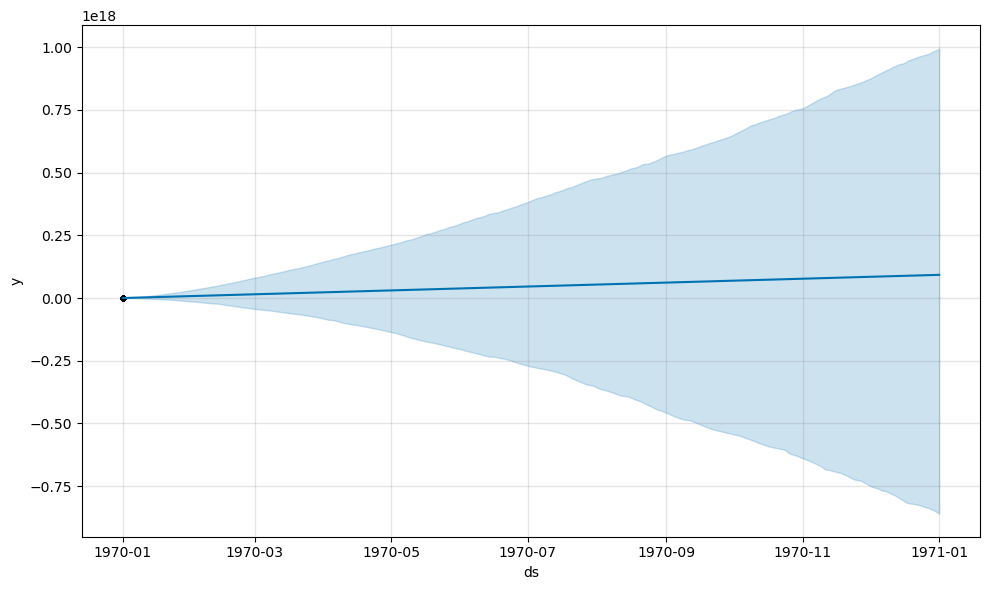

In [190]:
# Prepare DataFrame for Prophet
merged_data_prophet = merged_data[['Date_x', 'Close_x', 'Close_y']].copy()
merged_data_prophet.columns = ['ds', 'sp500', 'gold']  # Renaming columns as per Prophet's requirement

# Use the index as the 'ds' column
merged_data_prophet['ds'] = merged_data_prophet.index

# Ensure 'ds' column is in datetime format
merged_data_prophet['ds'] = pd.to_datetime(merged_data_prophet['ds'])

# Create a new DataFrame for Prophet with 'ds' and 'y' columns
prophet_data = merged_data_prophet[['ds', 'sp500']].copy()
prophet_data.columns = ['ds', 'y']  # Rename 'Close_x' column to 'y'

# Create and fit Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Making predictions for the next 365 days
forecast = model.predict(future)

# Plotting the forecast
fig = model.plot(forecast)
